<a href="https://colab.research.google.com/github/cmtrimble/cmtrimble.github.io/blob/main/Project_2_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Wrangler:** Caleb Trimble

**Data Scientist:** Michael Speer

**Data Visualizer/Presenter:** Elijah Taber

<center><h1>Project 2 - Life Expectancy</h1></center>

# **Life Expectancy & Population Data Card**
- **Dataset Sources:** CDC, NCHS, Census Bureau
- **Data Range:** 1910–2020 (Decade-based)
- **Key Features:** Race, Sex, Life Expectancy, Age-adjusted Death Rate, Population
- **Missing Values Check:** Few expected gaps; verified with `.isnull().sum()`
- **Data Types:** Mixed (Float for life expectancy/death rate, Integer for population)
- **Alignment Considerations:** Population in decade bins; life expectancy by year

Note on Dataset: Due to historical methodologies in data collection, many demographic groups are not explicitly represented in earlier life expectancy statistics. This stems from limitations in racial categorizations and population-based reporting practices at the time. More details on U.S. life expectancy trends can be found at
(https://nchstats.com/us-life-expectancy-trends/).


## Data Acquisition ##

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df_life = pd.read_csv('NCHS_Life_Expectancy.csv')
df_life.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,"2,518.0"
1,1901,All Races,Both Sexes,49.1,"2,473.1"
2,1902,All Races,Both Sexes,51.5,"2,301.3"
3,1903,All Races,Both Sexes,50.5,"2,379.0"
4,1904,All Races,Both Sexes,47.6,"2,502.5"


In [ ]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1071 non-null   int64  
 1   Race                             1071 non-null   object 
 2   Sex                              1071 non-null   object 
 3   Average Life Expectancy (Years)  1065 non-null   float64
 4   Age-adjusted Death Rate          1071 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 42.0+ KB


In [ ]:
df_population = pd.read_csv('apportionment.csv')
df_population.head()

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,State,1910,"2,138,093",16.9,42.2,25.0,10.0,1.0,"213,809"
1,Alaska,State,1910,"64,356",1.2,0.1,52.0,NaN,NaN,NaN
2,Arizona,State,1910,"204,354",66.2,1.8,49.0,NaN,NaN,NaN
3,Arkansas,State,1910,"1,574,449",20.0,30.3,30.0,7.0,0.0,"224,921"
4,California,State,1910,"2,377,549",60.1,15.3,38.0,11.0,3.0,"216,051"


In [ ]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Name                                                 684 non-null    object 
 1   Geography Type                                       684 non-null    object 
 2   Year                                                 684 non-null    int64  
 3   Resident Population                                  684 non-null    object 
 4   Percent Change in Resident Population                684 non-null    float64
 5   Resident Population Density                          636 non-null    object 
 6   Resident Population Density Rank                     624 non-null    float64
 7   Number of Representatives                            600 non-null    float64
 8   Change in Number of Representatives                  600 non-null    f

# Data Wrangling #

In [ ]:
df_life.isna().sum()

,0
Year,0
Race,0
Sex,0
Average Life Expectancy (Years),6
Age-adjusted Death Rate,0


## Data Cleaning ##

In [ ]:
df_population = df_population[df_population['Geography Type'] == 'Nation']
df_population = df_population[['Year', 'Resident Population']]
df_population


,Year,Resident Population
56,1910,"92,228,531"
113,1920,"106,021,568"
170,1930,"123,202,660"
227,1940,"132,165,129"
284,1950,"151,325,798"
341,1960,"179,323,175"
398,1970,"203,211,926"
455,1980,"226,545,805"
512,1990,"248,709,873"
569,2000,"281,421,906"


In [ ]:
df_life['Average Life Expectancy (Years)'] = df_life.groupby(['Race', 'Sex'])['Average Life Expectancy (Years)'].transform(lambda x: x.fillna(x.median()))

Fill missing Life Expectancy values using median within Race and Sex

In [ ]:
df_life.columns = df_life.columns.str.strip()

Remove any leading/trailing whitespace from colum names

In [ ]:
df_life.head(1)

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,"2,518.0"


## Data Transformation ##

In [ ]:
df_life['Decade'] = (df_life['Year'] // 10) * 10


Ensures life expectancy data aligns with population data, which is decade-based.

In [ ]:
df_population['Decade'] = df_population['Year']
df_population.drop(columns=['Year'], inplace=True)

Keeps dataset streamlined by removing redundant columns.

## Data Quality Check ##




### Missing Values ###

In [ ]:
df_life.isna().sum()

,0
Year,0
Race,0
Sex,0
Average Life Expectancy (Years),0
Age-adjusted Death Rate,0
Decade,0


In [ ]:
df_population.isna().sum()

,0
Resident Population,0
Decade,0


 Life Expectancy dataset has 119 missing values in 'Age-adjusted Death Rate'.
 - This suggests some mortality rate gaps that may need to be addressed.
 - Possible fixes: Filling gaps with medians (already applied) or dropping column if unnecessary.


### Verifying Data Types ###

In [ ]:
print("Dataset Overview: df_life")
df_life.info()

Dataset Overview: df_life
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1071 non-null   int64  
 1   Race                             1071 non-null   object 
 2   Sex                              1071 non-null   object 
 3   Average Life Expectancy (Years)  1071 non-null   float64
 4   Age-adjusted Death Rate          1071 non-null   object 
 5   Decade                           1071 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 50.3+ KB


In [ ]:
print("Dataset Overview: df_population")
df_population.info()

Dataset Overview: df_population
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 56 to 683
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Resident Population  12 non-null     object
 1   Decade               12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


df_population: Contains 12 entries, with 'Resident Population' stored as an **object type**.
 - **Potential Fix:** Convert 'Resident Population' to integer for numerical analysis.  

df_life: Contains 1071 entries, with 'Age-adjusted Death Rate' missing **119 values**.
 - **Already addressed in previous steps** using median filling.


## Multiple Sources Merger ##

In [ ]:
df_combined = df_life.merge(df_population, on='Decade', how='left')

In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1071 non-null   int64  
 1   Race                             1071 non-null   object 
 2   Sex                              1071 non-null   object 
 3   Average Life Expectancy (Years)  1071 non-null   float64
 4   Age-adjusted Death Rate          1071 non-null   object 
 5   Decade                           1071 non-null   int64  
 6   Resident Population              981 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 58.7+ KB


First things first, Age-adjusted Death Rate and Resident Population need to be converted from strings to integers.

In [ ]:
df_combined['Age-adjusted Death Rate'] = df_combined['Age-adjusted Death Rate'].astype(str).str.replace(',', '').astype(float)

# Only process non-NaN values
mask_non_na = df_combined['Resident Population'].notna()
df_combined.loc[mask_non_na, 'Resident Population'] = df_combined.loc[mask_non_na, 'Resident Population'].astype(str).str.replace(',', '').astype(int)

In [ ]:
df_combined

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate,Decade,Resident Population
0,1900,All Races,Both Sexes,47.30,2518.0,1900,NaN
1,1901,All Races,Both Sexes,49.10,2473.1,1900,NaN
2,1902,All Races,Both Sexes,51.50,2301.3,1900,NaN
3,1903,All Races,Both Sexes,50.50,2379.0,1900,NaN
4,1904,All Races,Both Sexes,47.60,2502.5,1900,NaN
...,...,...,...,...,...,...,...
1066,2014,White,Male,76.70,853.4,2010,308745538
1067,2015,White,Male,76.60,861.9,2010,308745538
1068,2016,White,Male,76.40,858.9,2010,308745538
1069,2017,White,Male,76.40,863.4,2010,308745538


All missing values in Resident Population are from 1900 to 1909. This makes it easy to fill. According to the U.S. Census, the population in 1900 was 76,212,168.

In [ ]:
mask = (df_combined['Year'] >= 1900) & (df_combined['Year'] <= 1909) & (df_combined['Resident Population'].isna())
df_combined.loc[mask, 'Resident Population'] = 76212168

In [ ]:
df_combined.isna().sum()

,0
Year,0
Race,0
Sex,0
Average Life Expectancy (Years),0
Age-adjusted Death Rate,0
Decade,0
Resident Population,0


Uses `.groupby(['Race', 'Sex'])` to ensure missing values are replaced **within relevant subgroups**.

Filling with median reduces bias compared to mean (which can be affected by extreme values).

Ensures **no gaps remain**, making the dataset ready for analysis.

In [ ]:
df_combined.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate,Decade,Resident Population
0,1900,All Races,Both Sexes,47.3,2518.0,1900,76212168
1,1901,All Races,Both Sexes,49.1,2473.1,1900,76212168
2,1902,All Races,Both Sexes,51.5,2301.3,1900,76212168
3,1903,All Races,Both Sexes,50.5,2379.0,1900,76212168
4,1904,All Races,Both Sexes,47.6,2502.5,1900,76212168


In [ ]:
df_combined.describe()

,Year,Average Life Expectancy (Years),Age-adjusted Death Rate,Decade
count,1071.000000,1071.000000,1071.000000,1071.000000
mean,1959.000000,64.514659,1593.061625,1954.537815
std,34.367176,11.816594,682.369379,34.309561
min,1900.000000,29.100000,611.300000,1900.000000
25%,1929.000000,57.150000,1012.950000,1920.000000
50%,1959.000000,66.800000,1513.700000,1950.000000
75%,1989.000000,73.900000,2057.150000,1980.000000
max,2018.000000,81.400000,3845.700000,2010.000000


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             1071 non-null   int64  
 1   Race                             1071 non-null   object 
 2   Sex                              1071 non-null   object 
 3   Average Life Expectancy (Years)  1071 non-null   float64
 4   Age-adjusted Death Rate          1071 non-null   float64
 5   Decade                           1071 non-null   int64  
 6   Resident Population              1071 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 58.7+ KB


### Validation ###

In [ ]:
correlation = df_combined[['Age-adjusted Death Rate', 'Average Life Expectancy (Years)']].corr()
print(correlation)

                                 Age-adjusted Death Rate  \
Age-adjusted Death Rate                         1.000000   
Average Life Expectancy (Years)                -0.985269   

                                 Average Life Expectancy (Years)  
Age-adjusted Death Rate                                -0.985269  
Average Life Expectancy (Years)                         1.000000  


Uses `.dropna()` to ensure correlation analysis is only performed on **complete data**.

Pearson correlation measures how strongly Age-adjusted Death Rate affects Life Expectancy.

Negative correlation (close to -1) suggests higher death rates **lower life expectancy**.


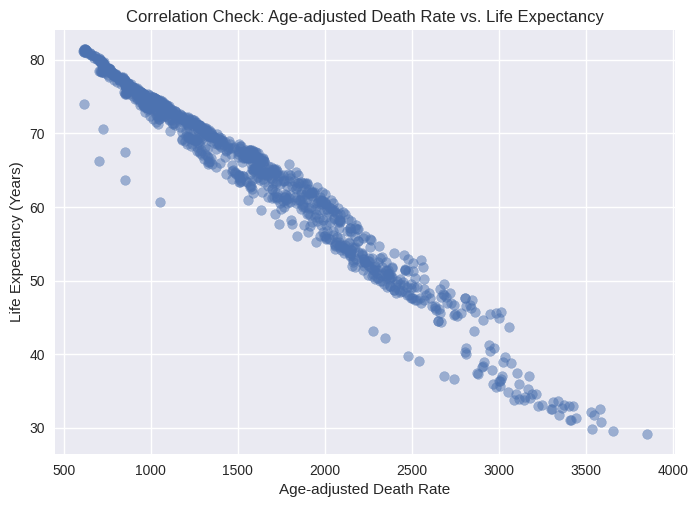

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_combined['Age-adjusted Death Rate'], df_combined['Average Life Expectancy (Years)'], alpha=0.5)
plt.xlabel("Age-adjusted Death Rate")
plt.ylabel("Life Expectancy (Years)")
plt.title("Correlation Check: Age-adjusted Death Rate vs. Life Expectancy")
plt.show()

## EDA

<ipython-input-81-cfaff075292b>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




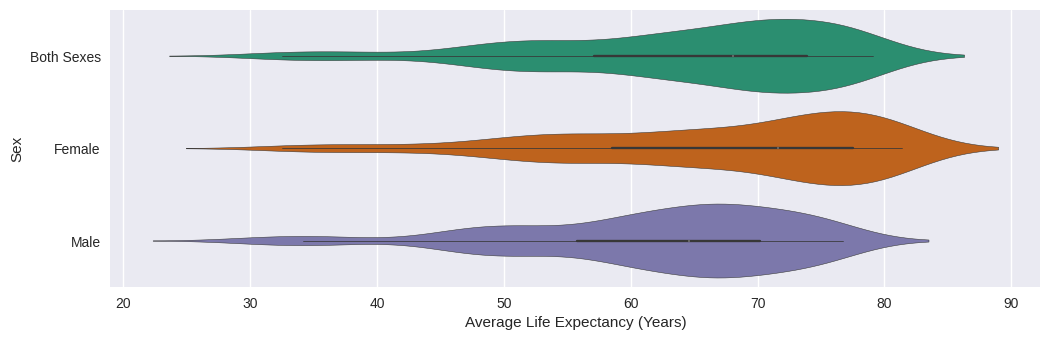

In [ ]:
# @title Sex vs Average Life Expectancy (Years)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_combined['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_combined, x='Average Life Expectancy (Years)', y='Sex', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-82-a1157732eadd>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




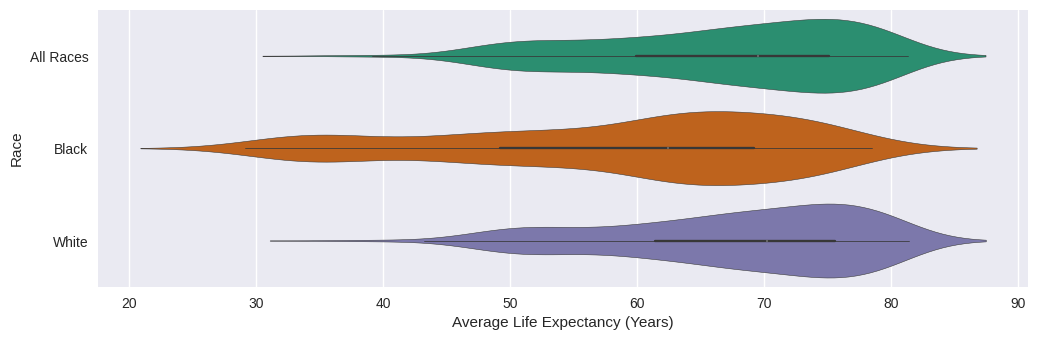

In [ ]:
# @title Race vs Average Life Expectancy (Years)

figsize = (12, 1.2 * len(df_combined['Race'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_combined, x='Average Life Expectancy (Years)', y='Race', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

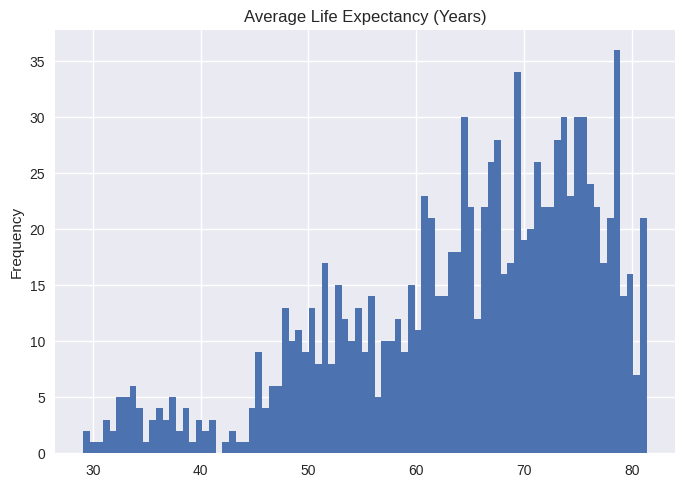

In [ ]:
# @title Average Life Expectancy (Years)

df_combined['Average Life Expectancy (Years)'].plot(kind='hist', bins=85, title='Average Life Expectancy (Years)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import plotly.express as px
import numpy as np

fig = px.histogram(
    df_combined,
    x='Average Life Expectancy (Years)',
    nbins=85,
    opacity=0.85,
    height=700,
    width=800,
)

mean_value = df_combined['Average Life Expectancy (Years)'].mean()
median_value = df_combined['Average Life Expectancy (Years)'].median()
std_dev = df_combined['Average Life Expectancy (Years)'].std()
min_val = df_combined['Average Life Expectancy (Years)'].min()
max_val = df_combined['Average Life Expectancy (Years)'].max()

fig.update_layout(
    title={
        'text': 'Distribution of Global Life Expectancy',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=22, family="Arial, sans-serif", color="white")
    },
    xaxis_title={
        'text': 'Life Expectancy (Years)',
        'font': dict(size=16, color="white")
    },
    yaxis_title={
        'text': 'Frequency',
        'font': dict(size=16, color="white")
    },
    plot_bgcolor='#6B6B6B',
    paper_bgcolor='#6B6B6B',
    bargap=0.1,
    font=dict(color="white"),
)

fig.update_traces(marker_color='orange')

fig.add_vline(x=mean_value, line_dash="dash", line_color="red", line_width=2)
fig.add_vline(x=median_value, line_dash="dash", line_color="green", line_width=2)

stats_text = (
    f"<b>Statistical Summary:</b><br>"
    f"Mean: {mean_value:.2f} years<br>"
    f"Median: {median_value:.2f} years<br>"
    f"Std Dev: {std_dev:.2f} years<br>"
    f"Range: {min_val:.1f} - {max_val:.1f} years"
)

fig.add_annotation(
    x=0.15,
    y=0.65,
    xref="paper",
    yref="paper",
    text=stats_text,
    showarrow=False,
    align="left",
    bgcolor="rgba(60, 60, 60, 0.8)",
    bordercolor="orange",
    borderwidth=1,
    borderpad=8,
    font=dict(family="Arial, sans-serif", size=14, color="white")
)

fig.update_xaxes(showgrid=True, gridcolor='rgba(255,255,255,0.2)')
fig.update_yaxes(showgrid=True, gridcolor='rgba(255,255,255,0.2)')

fig.update_layout(
    shapes=[
        dict(
            type='rect',
            xref='paper', yref='paper',
            x0=0, y0=0, x1=1, y1=1,
            line=dict(color='white', width=1),
            fillcolor='rgba(0,0,0,0)'
        )
    ]
)

fig.show()

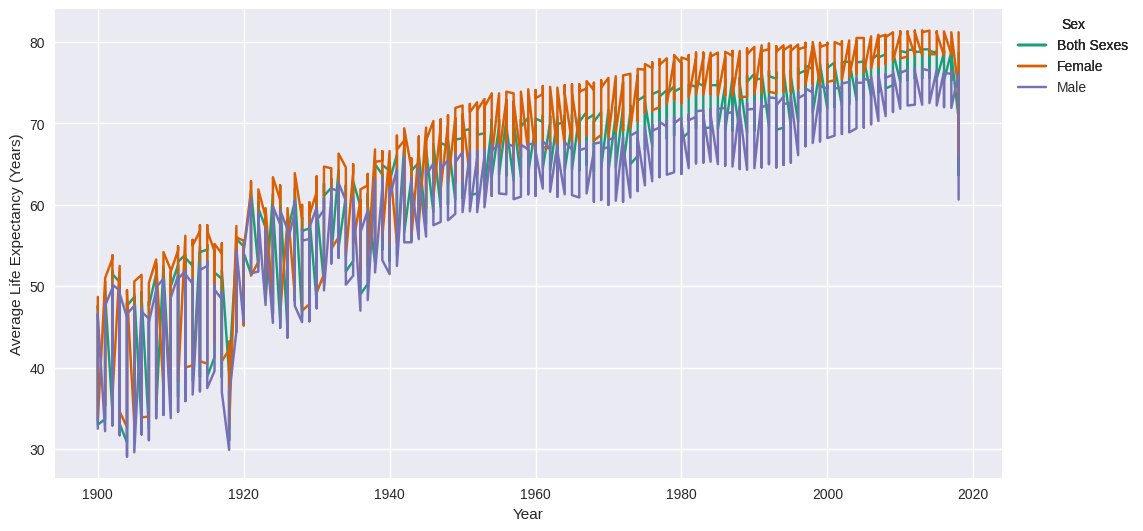

In [ ]:
# @title Year vs Average Life Expectancy (Years)

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Average Life Expectancy (Years)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_combined.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Average Life Expectancy (Years)')

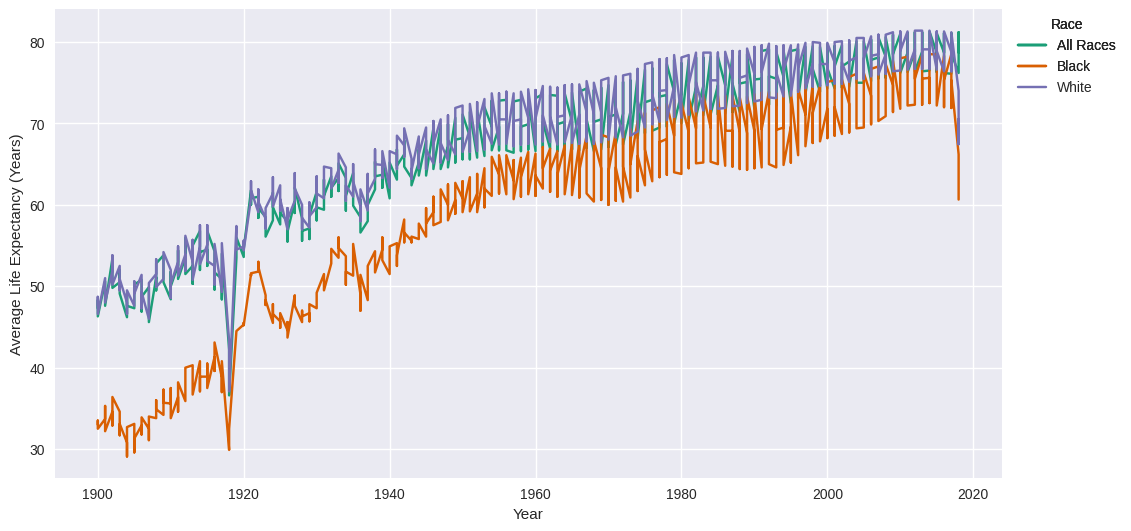

In [ ]:
# @title Year vs Average Life Expectancy (Years)

def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Average Life Expectancy (Years)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_combined.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Race')):
  _plot_series(series, series_name, i)
  fig.legend(title='Race', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Average Life Expectancy (Years)')

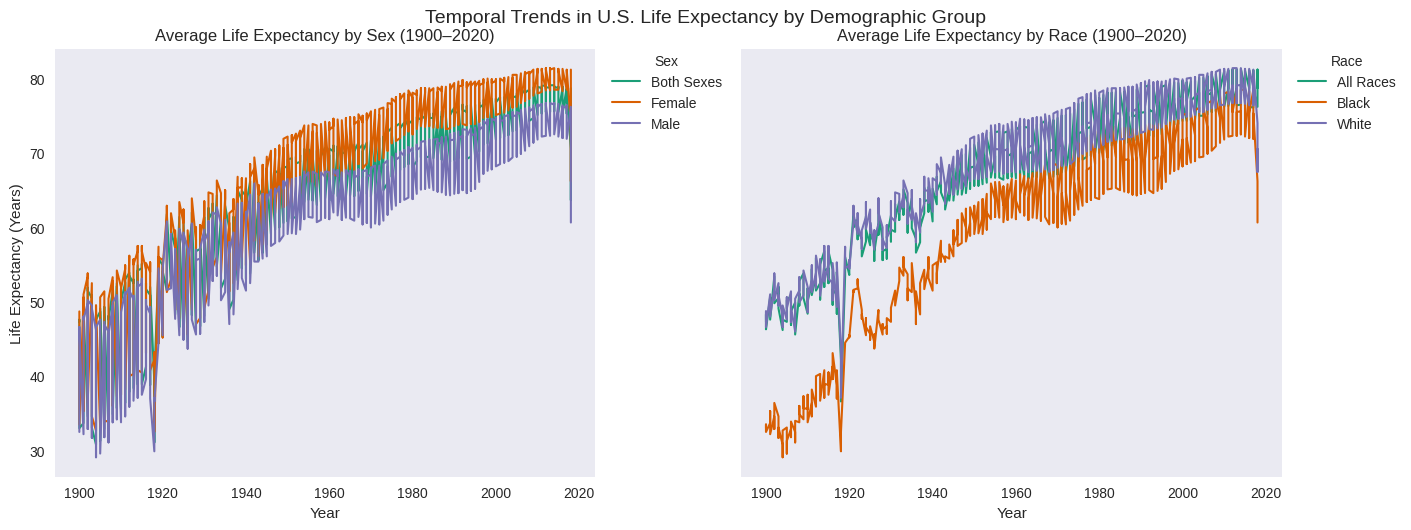

In [ ]:
def _plot_series(ax, series, series_name, series_index=0):
    palette = list(sns.color_palette('Dark2'))
    xs = series['Year']
    ys = series['Average Life Expectancy (Years)']
    ax.plot(xs, ys,
            label=series_name,
            color=palette[series_index % len(palette)],
            linewidth=1.5)

fig, axes = plt.subplots(nrows=1, ncols=2,
                         figsize=(14, 5),
                         sharey=True,
                         constrained_layout=True)

df_sorted = df_combined.sort_values('Year')
for i, (name, grp) in enumerate(df_sorted.groupby('Sex')):
    _plot_series(axes[0], grp, name, i)
axes[0].set_title('Average Life Expectancy by Sex (1900–2020)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Life Expectancy (Years)')
axes[0].legend(title='Sex',
               bbox_to_anchor=(1.02, 1),
               loc='upper left',
               borderaxespad=0)

for i, (name, grp) in enumerate(df_sorted.groupby('Race')):
    _plot_series(axes[1], grp, name, i)
axes[1].set_title('Average Life Expectancy by Race (1900–2020)')
axes[1].set_xlabel('Year')
axes[1].legend(title='Race',
               bbox_to_anchor=(1.02, 1),
               loc='upper left',
               borderaxespad=0)

for ax in axes:
    sns.despine(ax=ax)
    ax.grid(False)

plt.suptitle('Temporal Trends in U.S. Life Expectancy by Demographic Group', fontsize=14, y=1.03)
plt.show()

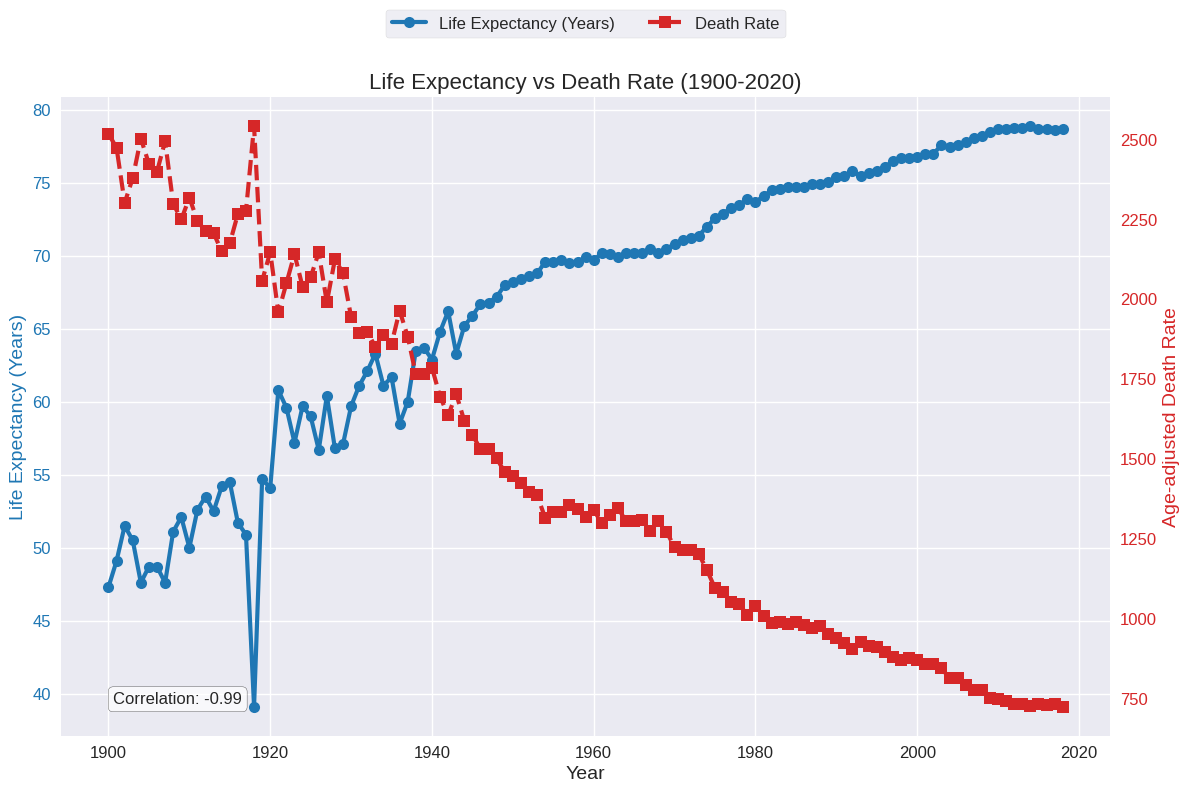

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

fig, ax = plt.subplots(figsize=(12, 8))

filtered_df = df_combined[(df_combined['Race'] == 'All Races') &
                          (df_combined['Sex'] == 'Both Sexes')]

ax.plot(filtered_df['Year'], filtered_df['Average Life Expectancy (Years)'],
        color='#1f77b4', linewidth=3, marker='o', markersize=8,
        label='Life Expectancy (Years)')

ax2 = ax.twinx()
ax2.plot(filtered_df['Year'], filtered_df['Age-adjusted Death Rate'],
         color='#d62728', linewidth=3, marker='s', markersize=8,
         linestyle='--', label='Death Rate')

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Life Expectancy (Years)', color='#1f77b4', fontsize=14)
ax2.set_ylabel('Age-adjusted Death Rate', color='#d62728', fontsize=14)
plt.title('Life Expectancy vs Death Rate (1900-2020)', fontsize=16)

ax.tick_params(axis='y', labelcolor='#1f77b4', labelsize=12)
ax.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelcolor='#d62728', labelsize=12)

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper center',
          bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12, frameon=True)

corr = filtered_df[['Average Life Expectancy (Years)', 'Age-adjusted Death Rate']].corr().iloc[0,1]
ax.text(0.05, 0.05, f'Correlation: {corr:.2f}', transform=ax.transAxes,
        fontsize=12, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

plt.tight_layout()
plt.grid(False)
plt.show()

In [ ]:
df_modeling = pd.get_dummies(df_combined
                             , prefix = ['Race', 'Sex']
                             , columns = ['Race', 'Sex']
).drop(['Age-adjusted Death Rate', 'Resident Population'], axis = 1)

df_modeling

,Year,Average Life Expectancy (Years),Decade,Race_All Races,Race_Black,Race_White,Sex_Both Sexes,Sex_Female,Sex_Male
0,1900,47.30,1900,True,False,False,True,False,False
1,1901,49.10,1900,True,False,False,True,False,False
2,1902,51.50,1900,True,False,False,True,False,False
3,1903,50.50,1900,True,False,False,True,False,False
4,1904,47.60,1900,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1066,2014,76.70,2010,False,False,True,False,False,True
1067,2015,76.60,2010,False,False,True,False,False,True
1068,2016,76.40,2010,False,False,True,False,False,True
1069,2017,76.40,2010,False,False,True,False,False,True


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
X = df_modeling.drop('Average Life Expectancy (Years)', axis = 1)
y = df_modeling['Average Life Expectancy (Years)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
def test_models(y_pred, y_true = y_test):
  print(f'\tMean Absolute Error: {mean_absolute_error(y_true, y_pred)}')
  print(f'\tR-Squared Error:     {r2_score(y_true, y_pred)}')
  print('\n')

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_y_pred = lin_reg.predict(X_test)

In [ ]:
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X_train, y_train)

dt_y_pred = dec_tree_reg.predict(X_test)

In [ ]:
rand_forest_reg = RandomForestRegressor()
rand_forest_reg.fit(X_train, y_train)

rf_y_pred = rand_forest_reg.predict(X_test)

In [ ]:
print('Evaluation for Linear Regression:')
test_models(lin_y_pred)

print('Evaluation for Decision Tree Regression:')
test_models(dt_y_pred)

print('Evaluation for Random Forest Regression:')
test_models(rf_y_pred)

Evaluation for Linear Regression:
	Mean Absolute Error: 2.7774450648865963
	R-Squared Error:     0.8970138548625268


Evaluation for Decision Tree Regression:
	Mean Absolute Error: 0.6891791044776121
	R-Squared Error:     0.9867387875510699


Evaluation for Random Forest Regression:
	Mean Absolute Error: 0.542949626865671
	R-Squared Error:     0.9907434678981174




In [ ]:
all_model_df = df_modeling
all_model_df['Average Life Expectancy (Linear Regression)'] = lin_reg.predict(X)
all_model_df['Average Life Expectancy (Decision Tree)'] = dec_tree_reg.predict(X)
all_model_df['Average Life Expectancy (Random Forest)'] = rand_forest_reg.predict(X)


# df_unpivot = pd.melt(df, id_vars='col1', value_vars=['col2', 'col3', ...])
all_model_df

,Year,Average Life Expectancy (Years),Decade,Race_All Races,Race_Black,Race_White,Sex_Both Sexes,Sex_Female,Sex_Male,Average Life Expectancy (Linear Regression),Average Life Expectancy (Decision Tree),Average Life Expectancy (Random Forest)
0,1900,47.30,1900,True,False,False,True,False,False,49.905746,47.30,47.606
1,1901,49.10,1900,True,False,False,True,False,False,50.043052,49.10,48.888
2,1902,51.50,1900,True,False,False,True,False,False,50.180358,51.50,51.083
3,1903,50.50,1900,True,False,False,True,False,False,50.317663,50.90,50.711
4,1904,47.60,1900,True,False,False,True,False,False,50.454969,47.60,48.117
...,...,...,...,...,...,...,...,...,...,...,...,...
1066,2014,76.70,2010,False,False,True,False,False,True,81.659389,76.60,76.594
1067,2015,76.60,2010,False,False,True,False,False,True,81.796695,76.60,76.563
1068,2016,76.40,2010,False,False,True,False,False,True,81.934000,76.40,76.254
1069,2017,76.40,2010,False,False,True,False,False,True,82.071306,76.40,76.196


In [ ]:
# ## This is necessary because the from_dummies() function requires booleans cast as integers

# for c in all_model_df.columns:
#   all_model_df[c].dtype == 'boolean'
#   all_model_df[c] = all_model_df[c].astype(int)


In [ ]:
all_model_df[['Race']] = pd.from_dummies(
    all_model_df[[c for c in all_model_df.columns if 'Race_' in c]]
    , sep = '_'
    )
all_model_df[['Sex']] = pd.from_dummies(
    all_model_df[[c for c in all_model_df.columns if 'Sex_' in c]]
    , sep = '_'
    )

In [ ]:
all_model_df = all_model_df.drop([c for c in all_model_df.columns if '_' in c], axis = 1)
all_model_df

,Year,Average Life Expectancy (Years),Decade,Average Life Expectancy (Linear Regression),Average Life Expectancy (Decision Tree),Average Life Expectancy (Random Forest),Race,Sex
0,1900,47.30,1900,49.905746,47.30,47.606,All Races,Both Sexes
1,1901,49.10,1900,50.043052,49.10,48.888,All Races,Both Sexes
2,1902,51.50,1900,50.180358,51.50,51.083,All Races,Both Sexes
3,1903,50.50,1900,50.317663,50.90,50.711,All Races,Both Sexes
4,1904,47.60,1900,50.454969,47.60,48.117,All Races,Both Sexes
...,...,...,...,...,...,...,...,...
1066,2014,76.70,2010,81.659389,76.60,76.594,White,Male
1067,2015,76.60,2010,81.796695,76.60,76.563,White,Male
1068,2016,76.40,2010,81.934000,76.40,76.254,White,Male
1069,2017,76.40,2010,82.071306,76.40,76.196,White,Male


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

models = [
    ("Average Life Expectancy (Linear Regression)", "Linear Regression"),
    ("Average Life Expectancy (Decision Tree)",       "Decision Tree"),
    ("Average Life Expectancy (Random Forest)",       "Random Forest"),
]

races = all_model_df['Race'].unique()
sexes = all_model_df['Sex'].unique()
combos = [(r, s) for r in races for s in sexes]

fig = make_subplots(rows=1, cols=3, subplot_titles=[title for _, title in models], horizontal_spacing=0.05)

palette = px.colors.qualitative.Vivid

for col_idx, (col_name, _) in enumerate(models, start=1):
    for i, (race, sex) in enumerate(combos):
        df_sub = all_model_df[(all_model_df['Race'] == race) & (all_model_df['Sex'] == sex)]
        fig.add_trace(
            go.Scatter(
                x=df_sub['Year'],
                y=df_sub[col_name],
                mode='lines',
                name=f"{race} • {sex}",
                legendgroup=f"{race}-{sex}",
                showlegend=(col_idx == 1),
                line=dict(color=palette[i % len(palette)], width=2)
            ),
            row=1, col=col_idx
        )

fig.update_layout(
    width=1600,
    height=800,
    paper_bgcolor='black',
    plot_bgcolor='black',
    margin=dict(l=50, r=50, t=150, b=50),
    title={
        'text': "Life Expectancy Predictions by Model, Race & Sex",
        'x': 0.5,
        'xanchor': 'center',
        'y': 0.95,
        'yanchor': 'top',
        'font': dict(color='white', size=24)
    },
    legend=dict(
        orientation='h',
        x=0.5, y=1.05,
        xanchor='center',
        yanchor='bottom',
        bgcolor='rgba(0,0,0,0)',
        font=dict(color='white', size=12),
        bordercolor='white',
        borderwidth=1
    )
)

for anno in fig.layout.annotations:
    anno.font.color = 'white'

# X-axes
fig.update_xaxes(
    title_text='Year',
    title_font=dict(size=22),
    tickfont=dict(size=14),
    showgrid=True, gridcolor='white', gridwidth=0.5,
    color='white', linecolor='white', mirror=True
)

# Y-axes (col 1)
fig.update_yaxes(
    title_text='Life Expectancy (Years)',
    title_font=dict(size=22),
    tickfont=dict(size=14),
    showgrid=True, gridcolor='white', gridwidth=0.5,
    color='white', linecolor='white', mirror=True,
    row=1, col=1
)

# Y-axes (col 2)
fig.update_yaxes(
    tickfont=dict(size=14),
    showgrid=True, gridcolor='white', gridwidth=0.5,
    color='white', linecolor='white', mirror=True,
    row=1, col=2
)

# Y-axes (col 3)
fig.update_yaxes(
    tickfont=dict(size=14),
    showgrid=True, gridcolor='white', gridwidth=0.5,
    color='white', linecolor='white', mirror=True,
    row=1, col=3
)

fig.show()

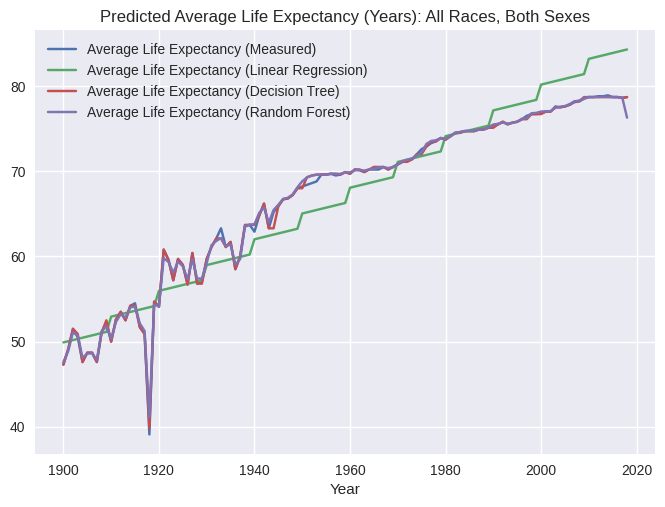

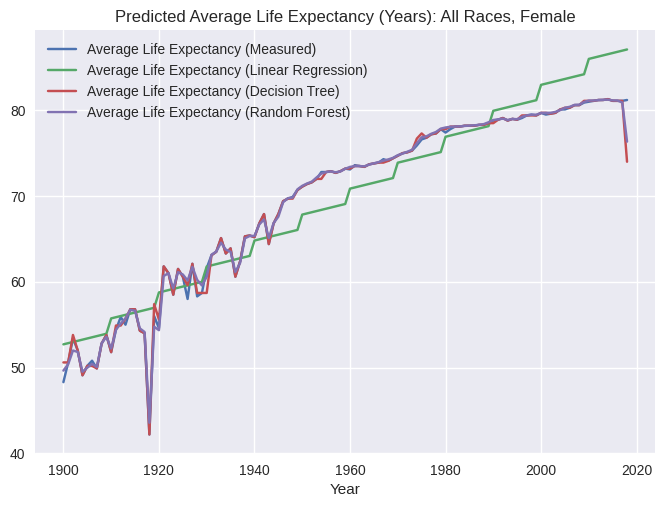

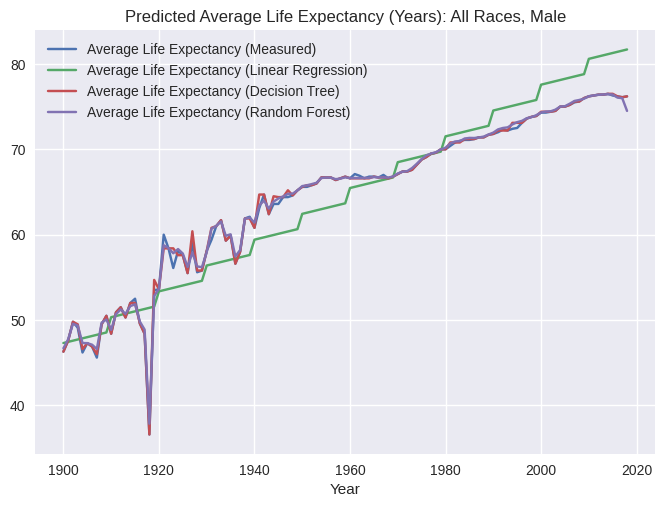

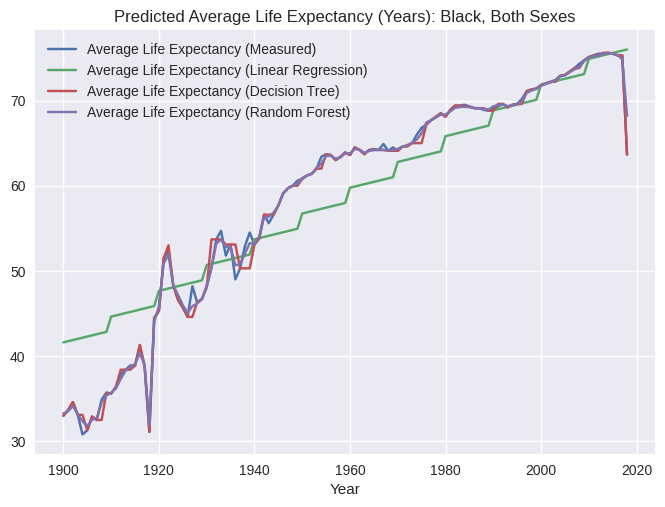

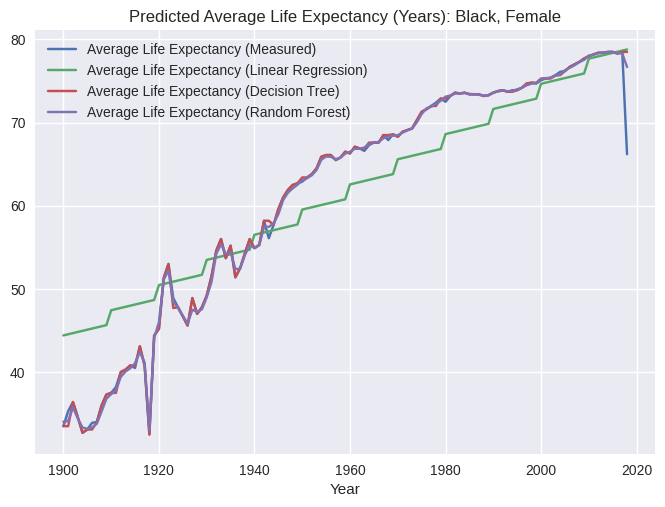

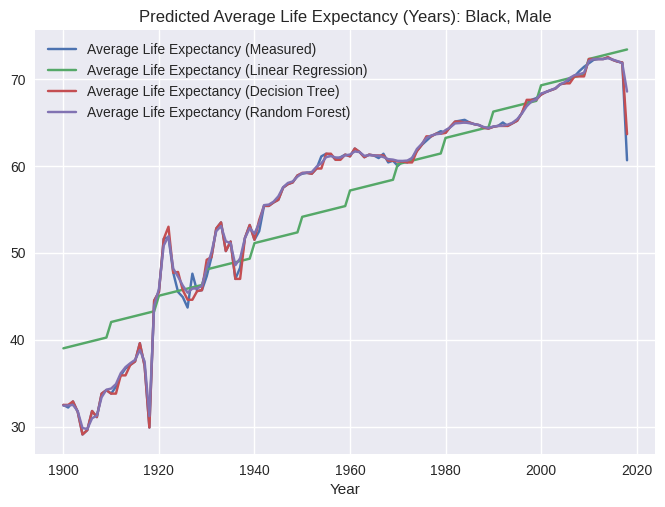

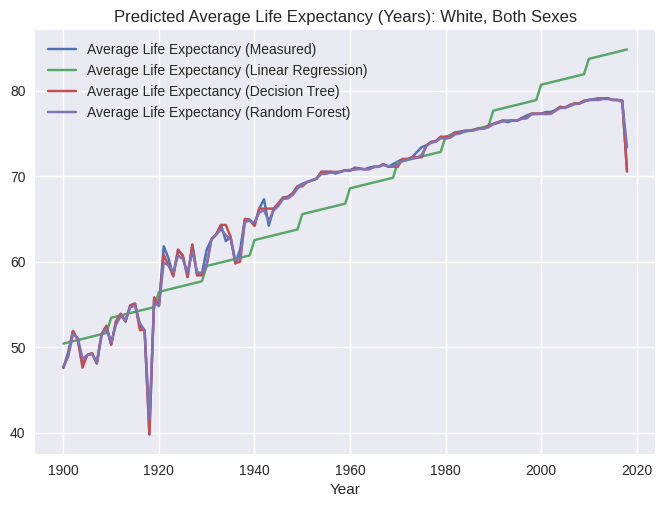

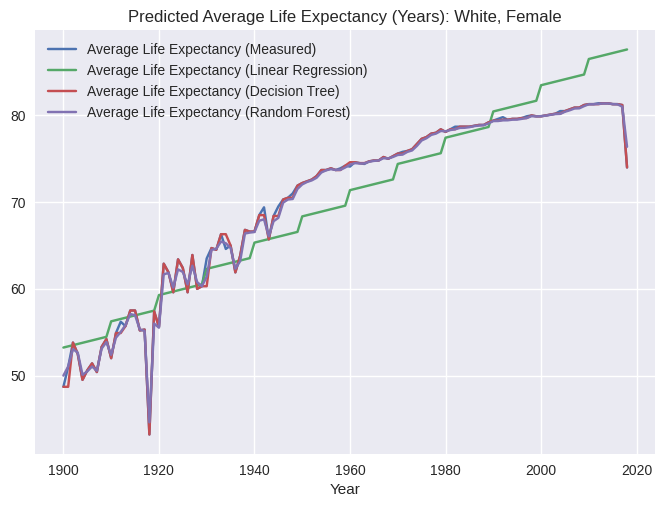

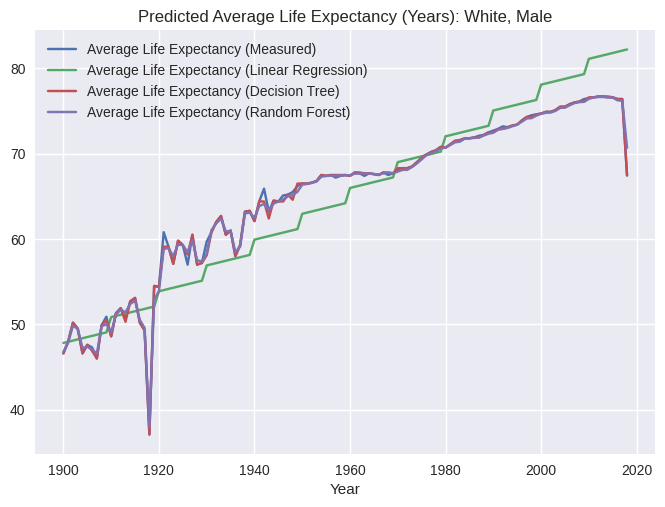

In [ ]:
# Get unique categories
races = all_model_df['Race'].unique()
sexes = all_model_df['Sex'].unique()

all_model_df['Average Life Expectancy (Measured)'] = all_model_df['Average Life Expectancy (Years)']
# Plot data
for race in races:
  for sex in sexes:
    subset = all_model_df[(all_model_df['Race'] == race) & (all_model_df['Sex'] == sex)]
    subset.plot(x = 'Year'
                , y = ['Average Life Expectancy (Measured)'
                  , 'Average Life Expectancy (Linear Regression)'
                  , 'Average Life Expectancy (Decision Tree)'
                  , 'Average Life Expectancy (Random Forest)']
                , title = f'Predicted Average Life Expectancy (Years): {race}, {sex}'
                )

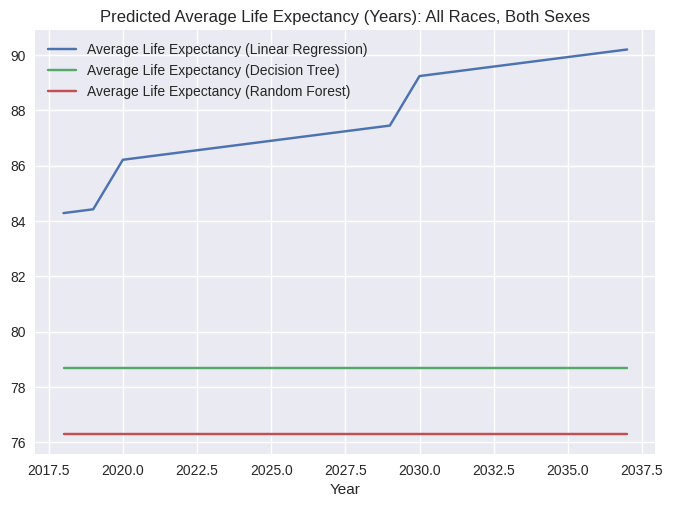

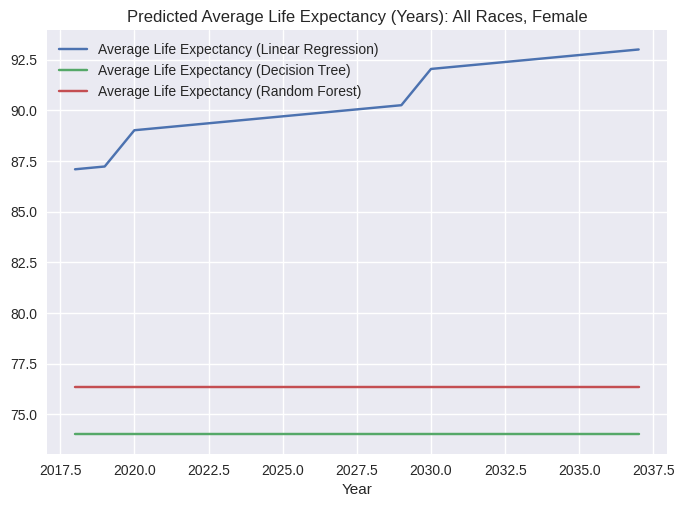

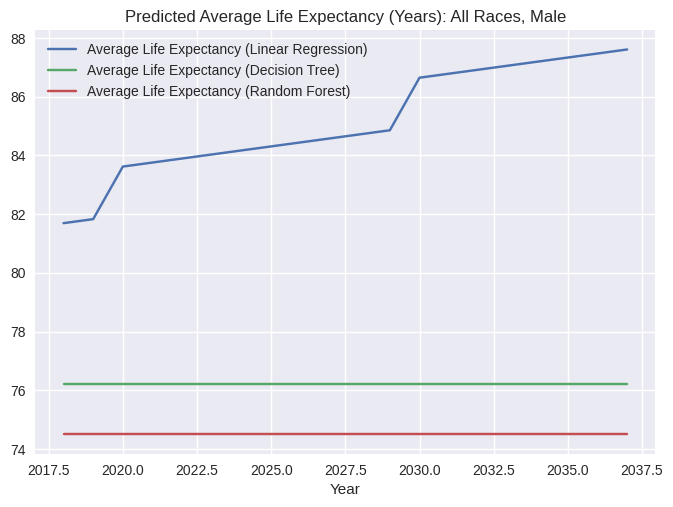

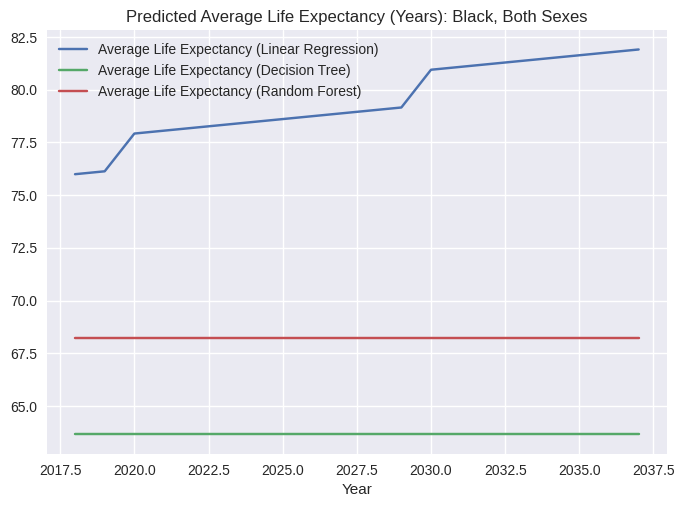

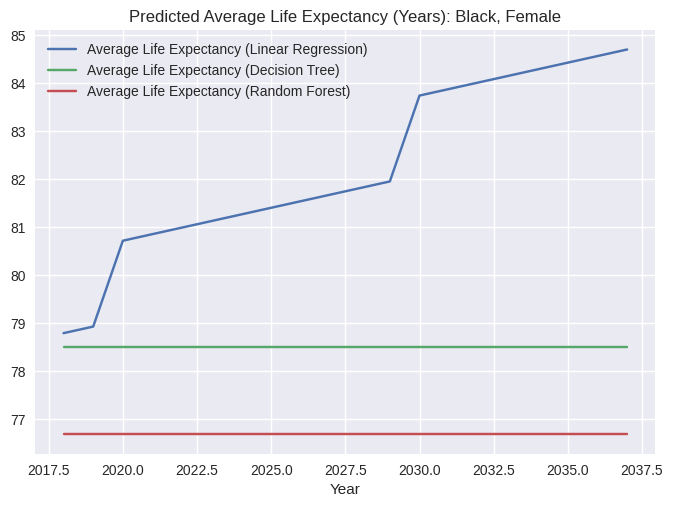

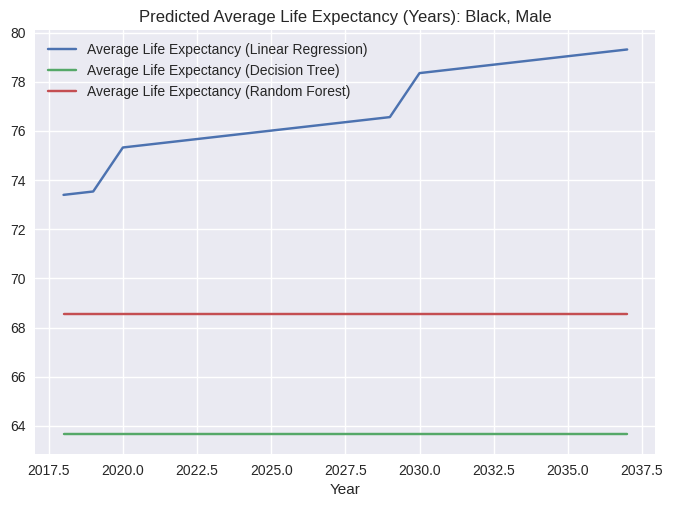

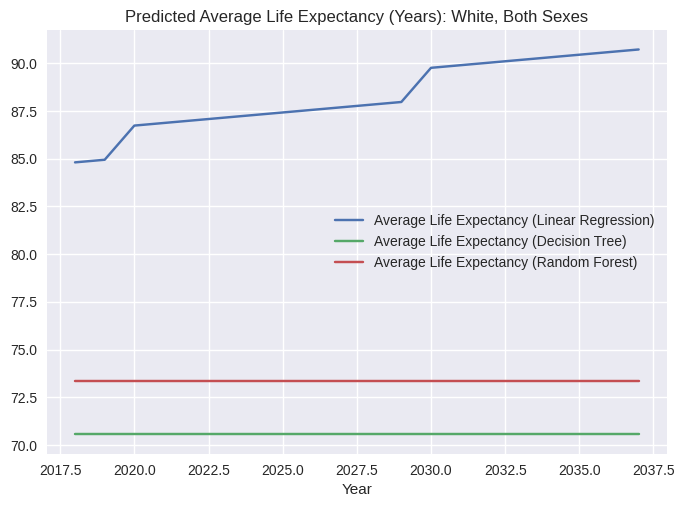

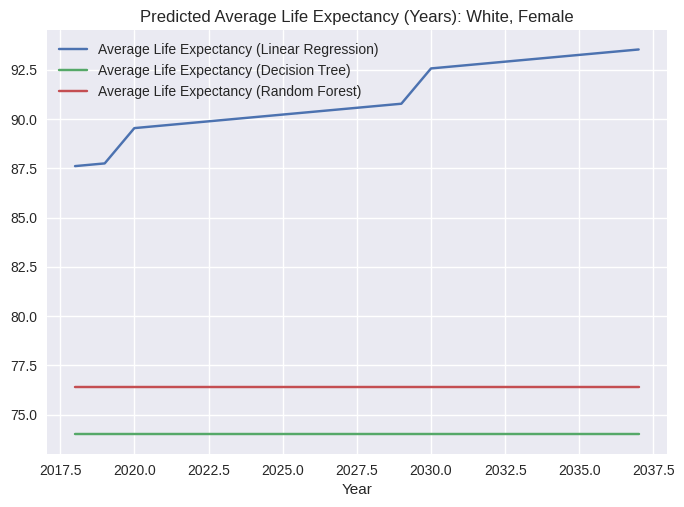

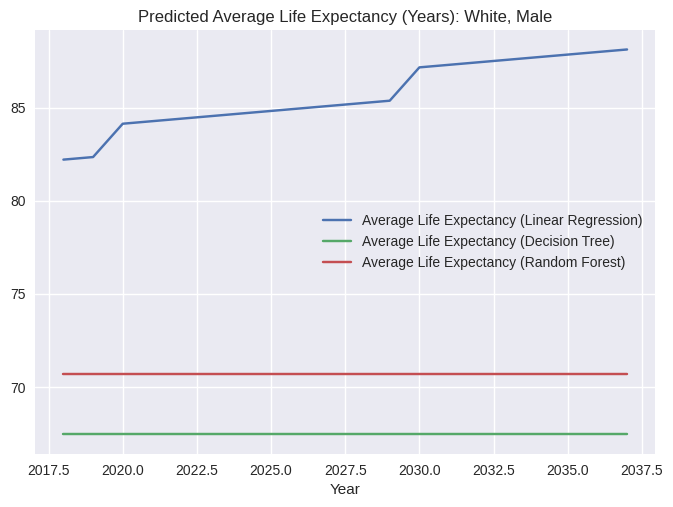

In [ ]:
# Get unique categories
# races = all_model_df['Race'].unique()
# sexes = all_model_df['Sex'].unique()


listOfLists =     [
                    [
                        [
                          {'Year': yearInt
                          , 'Decade': (yearInt  // 10) * 10
                          , 'Race': race
                          , 'Sex': sex}
                          for yearInt in range(2018, 2038)
                        ]
                        for race in races
                    ]
                    for sex in sexes
                ]

dataToPredict = []

for i in range(0, len(listOfLists)):
  for ii in range(0, len(listOfLists[0])):
    dataToPredict.extend(listOfLists[i][ii])

predictedFuture = pd.DataFrame(
  dataToPredict
)

predictedFuture = pd.get_dummies(predictedFuture
                             , prefix = ['Race', 'Sex']
                             , columns = ['Race', 'Sex']
)

predictedFutureLin = lin_reg.predict(predictedFuture)
predictedFutureDT = dec_tree_reg.predict(predictedFuture)
predictedFutureRF = rand_forest_reg.predict(predictedFuture)

predictedFuture['Average Life Expectancy (Linear Regression)'] = predictedFutureLin
predictedFuture['Average Life Expectancy (Decision Tree)'] = predictedFutureDT
predictedFuture['Average Life Expectancy (Random Forest)'] = predictedFutureRF


predictedFuture[['Race']] = pd.from_dummies(
    predictedFuture[[c for c in predictedFuture.columns if 'Race_' in c]]
    , sep = '_'
    )
predictedFuture[['Sex']] = pd.from_dummies(
    predictedFuture[[c for c in predictedFuture.columns if 'Sex_' in c]]
    , sep = '_'
    )
predictedFuture = predictedFuture.drop([c for c in predictedFuture.columns if '_' in c], axis = 1)
# Plot data
for race in races:
  for sex in sexes:

    subset = predictedFuture[(predictedFuture['Race'] == race) & (predictedFuture['Sex'] == sex)]
    subset.plot(x = 'Year'
                , y = ['Average Life Expectancy (Linear Regression)'
                        , 'Average Life Expectancy (Decision Tree)'
                        , 'Average Life Expectancy (Random Forest)']
                , title = f'Predicted Average Life Expectancy (Years): {race}, {sex}'
                )